In [30]:
import numpy as np
import librosa
from librosa.display import specshow
import matplotlib.pyplot as plt
from IPython.display import Audio
   
def plot_spec(spec):
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', y_axis='mel', sr=16000, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()


def to_numpy(t):
    return t.view(256,128).detach().numpy()

In [22]:
CHECKPOINT = 'spectral-u-net-1576558357.full.ckpt'

In [23]:
from src.datasets import NoisySpectralSpeechDataset
from src.utils import checkpoint, spectral, notebook

In [24]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [25]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()

In [26]:
IDX = 124

noisy_spec, clean_spec = dataset[IDX]

In [27]:
pred_clean_spec = net(noisy_spec.view(1, 1, 256, 128))
pred_clean_spec = (pred_clean_spec.view(256,128).detach().numpy()

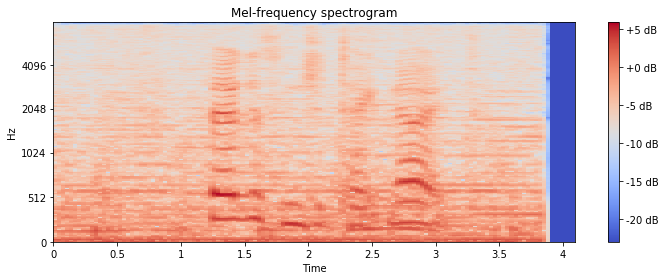

In [28]:
plot_spec(pred_clean_spec)

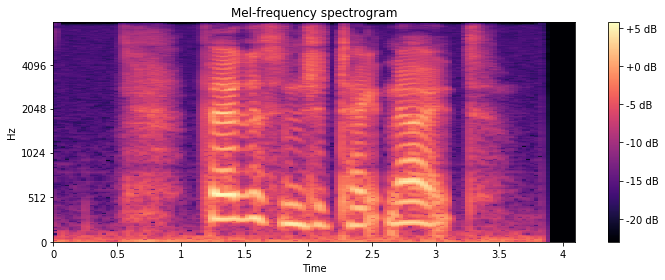

In [29]:
plot_spec(to_numpy(clean_spec))

In [31]:
audio_arr = spectral.log_mel_spec_to_audio(pred_clean_spec)
Audio(audio_arr, rate=16000)

In [32]:
audio_arr = spectral.log_mel_spec_to_audio(clean_spec)
Audio(audio_arr, rate=16000)

TypeError: data type not understood